In [1]:
import pyforest
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

# body opinion

In [21]:
body_opinion=pd.read_csv('../datasets/body_opinion.csv',index_col=0)

In [22]:
body_opinion

,Id,Haz una breve reflexión libre acerca de como te sientes con tu cuerpo.
0,0,"En general bien, hasta que empiezo a compararm..."
2,2,Aprendiendo a aceptarme y quererme desaprendie...
3,3,Horrible
4,4,"Me veo delgada, me gustaría tener más carne, l..."
6,6,Le acepto ahora más pero me sigue generando in...
...,...,...
425,425,Me siento bastante cómoda con mi cuerpo como e...
428,428,Es mejorable
429,429,Después de muchos años he llegado a aceptar y ...
431,431,"Mal. Constantemente me juzgo, me siento mal co..."


In [23]:
body_opinion.rename(columns={'Id':'Id','Haz una breve reflexión libre acerca de como te sientes con tu cuerpo.':'reflexion'},inplace=True)

## VADER sentiment analysis

In [24]:
# load the SentimentIntensityAnalyser object in
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [25]:
import sys
sys.path.insert(0, '/Users/dpagniez/Desktop/Functions')

from fx_NLP import *

In [26]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [27]:
body_opinion['sentiment_neg'] = body_opinion['reflexion'].apply(negative_score)

In [28]:
body_opinion['sentiment_pos'] = body_opinion['reflexion'].apply(positive_score)

In [29]:
body_opinion['sentiment_neu'] = body_opinion['reflexion'].apply(neutral_score)

In [30]:
body_opinion['sentiment_comp'] = body_opinion['reflexion'].apply(compound_score)

In [31]:
body_opinion

,Id,reflexion,sentiment_neg,sentiment_pos,sentiment_neu,sentiment_comp
0,0,"En general bien, hasta que empiezo a compararm...",0.000,0.000,1.000,0.0000
2,2,Aprendiendo a aceptarme y quererme desaprendie...,0.047,0.000,0.953,-0.2960
3,3,Horrible,1.000,0.000,0.000,-0.5423
4,4,"Me veo delgada, me gustaría tener más carne, l...",0.000,0.000,1.000,0.0000
6,6,Le acepto ahora más pero me sigue generando in...,0.000,0.000,1.000,0.0000
...,...,...,...,...,...,...
425,425,Me siento bastante cómoda con mi cuerpo como e...,0.000,0.000,1.000,0.0000
428,428,Es mejorable,0.000,0.000,1.000,0.0000
429,429,Después de muchos años he llegado a aceptar y ...,0.000,0.000,1.000,0.0000
431,431,"Mal. Constantemente me juzgo, me siento mal co...",0.000,0.000,1.000,0.0000


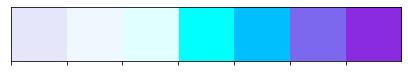

In [32]:
colors = ['lavender','aliceblue','lightcyan','cyan',"DeepSkyBlue", "MediumSlateBlue","BlueViolet"]
sns.palplot(sns.color_palette(colors))

''

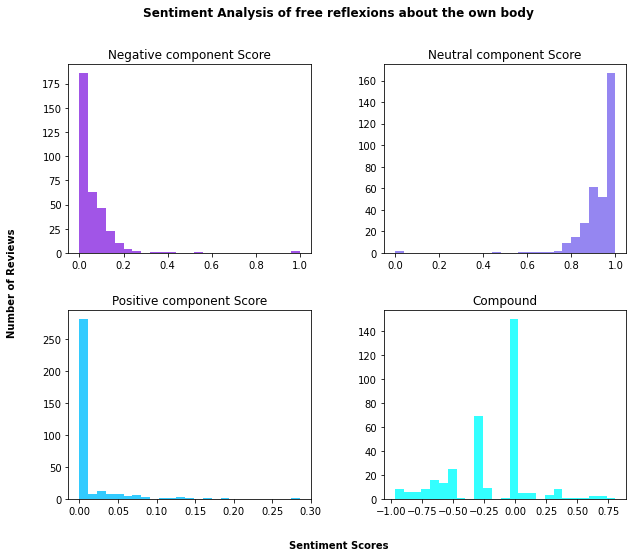

In [33]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
body_opinion.hist('sentiment_neg', bins=25, ax=axes[0,0], color='BlueViolet', alpha=0.8,grid=False)
axes[0,0].set_title('Negative component Score')

body_opinion.hist('sentiment_neu', bins=25, ax=axes[0,1], color='MediumSlateBlue', alpha=0.8,grid=False)
axes[0,1].set_title('Neutral component Score')

body_opinion.hist('sentiment_pos', bins=25, ax=axes[1,0], color='DeepSkyBlue', alpha=0.8,grid=False)
axes[1,0].set_title('Positive component Score')

body_opinion.hist('sentiment_comp', bins=25, ax=axes[1,1], color='cyan', alpha=0.8,grid=False)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of free reflexions about the own body\n\n', fontsize=12, fontweight='bold')
#axes.spines['top'].set_visible(False)
#axes.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.savefig('sentiment_analysis_gridplot.png')
;

In [34]:
filter_neg = body_opinion[body_opinion.sentiment_comp <= -0.05]

In [35]:
len(filter_neg)

162

In [36]:
filter_neu = body_opinion[(body_opinion.sentiment_comp > -0.05)&(body_opinion.sentiment_comp < 0.05)]

In [37]:
len(filter_neu)

150

In [38]:
filter_pos = body_opinion[body_opinion.sentiment_comp >= 0.05]

In [39]:
len(filter_pos)

29

In [40]:
len(body_opinion)

341

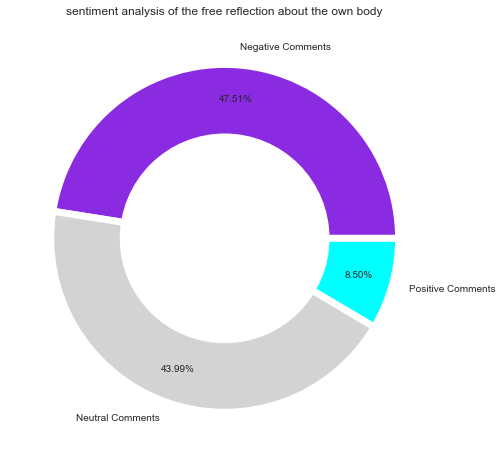

In [49]:
# assign the data
neg = len(filter_neg)*100/len(body_opinion)
mid = len(filter_neu)*100/len(body_opinion)
pos = len(filter_pos)*100/len(body_opinion)
names = ['Negative Comments', 'Neutral Comments','Positive Comments']

size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['blueviolet', 'lightgray', 'cyan'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('sentiment analysis of the free reflection about the own body')
plt.show()
fig.savefig('sentiment_analysis_donut.png')


In [42]:
neg_comments = filter_neg['reflexion'].tolist()

In [43]:
pos_comments = filter_pos['reflexion'].tolist()

In [44]:
filter_neg['text_length'] = filter_neg['reflexion'].apply(len)
filter_pos['text_length'] = filter_pos['reflexion'].apply(len)

In [45]:
filter_neu['text_length'] = filter_neu['reflexion'].apply(len)

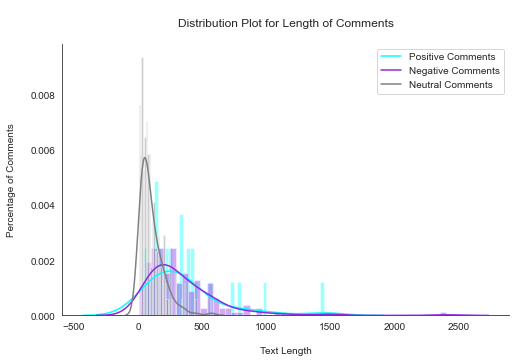

In [46]:
sns.set_style("white")
plt.figure(figsize=(8,5))

sns.distplot(filter_pos['text_length'], kde=True, bins=50, color='cyan')
sns.distplot(filter_neg['text_length'], kde=True, bins=50, color='blueviolet')
sns.distplot(filter_neu['text_length'], kde=True, bins=50, color='grey')

plt.title('\nDistribution Plot for Length of Comments\n')
plt.legend(['Positive Comments', 'Negative Comments','Neutral Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n')
sns.despine();

plt.savefig('length_of_reflexions_distplot.png')

## wordclouds

In [ ]:
neg_comments

In [ ]:
wordcloud = WordCloud(max_font_size=600, max_words=500, background_color="white",colormap='cool',
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('spanish')).generate(" ".join(filter_neg.reflexion.values))

plot_wordcloud(wordcloud, '\n Negative reflections ')
wordcloud.to_file('Neg_coments.png')

In [ ]:
#wordcloud = WordCloud(max_font_size=600, max_words=500, background_color="white",
#                      width= 3000, height = 2000,
#                     stopwords = stopwords.words('spanish')).generate(" ".join(neg_comments))

#plot_wordcloud(wordcloud, '\nReflexiones negativas ')

In [ ]:
wordcloud = WordCloud(max_font_size=600, max_words=500, background_color="white",colormap ='cool',
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('spanish')).generate(" ".join(filter_pos.reflexion.values))
#.generate(str(filter_negeflexion.values))

plot_wordcloud(wordcloud, '\n Positive reflections')
wordcloud.to_file('Pos_coments.png')

# contenido seguido

In [2]:
cont_seguido=pd.read_csv('../datasets/contenido_seguido.csv',index_col=0)

In [3]:
cont_seguido

,Id,cont_seguido_tipo
3,3,Animales y plantas;Recetas y comida;Salud y De...
7,7,Animales y plantas;Recetas y comida;Belleza;Mo...
11,11,Animales y plantas;Viajes y paisajes;Recetas y...
13,13,Animales y plantas;Recetas y comida;Feminismo
18,18,Recetas y comida;Salud y Deporte;Noticias/Info...
...,...,...
425,425,"Animales y plantas;Recetas y comida;Educación,..."
426,426,Animales y plantas;Viajes y paisajes;Recetas y...
428,428,Recetas y comida;Salud y Deporte;Belleza;Notic...
429,429,Viajes y paisajes;Feminismo;Otros


In [4]:
#evitar = poses.filter(regex = 'evitar')
seguido = cont_seguido.cont_seguido_tipo
seguido

3      Animales y plantas;Recetas y comida;Salud y De...
7      Animales y plantas;Recetas y comida;Belleza;Mo...
11     Animales y plantas;Viajes y paisajes;Recetas y...
13         Animales y plantas;Recetas y comida;Feminismo
18     Recetas y comida;Salud y Deporte;Noticias/Info...
                             ...                        
425    Animales y plantas;Recetas y comida;Educación,...
426    Animales y plantas;Viajes y paisajes;Recetas y...
428    Recetas y comida;Salud y Deporte;Belleza;Notic...
429                    Viajes y paisajes;Feminismo;Otros
430    Animales y plantas;Viajes y paisajes;Recetas y...
Name: cont_seguido_tipo, Length: 246, dtype: object

In [5]:
# Manual tokenization by ;
seguido = seguido.str.split(';')
seguido

3      [Animales y plantas, Recetas y comida, Salud y...
7      [Animales y plantas, Recetas y comida, Belleza...
11     [Animales y plantas, Viajes y paisajes, Receta...
13     [Animales y plantas, Recetas y comida, Feminismo]
18     [Recetas y comida, Salud y Deporte, Noticias/I...
                             ...                        
425    [Animales y plantas, Recetas y comida, Educaci...
426    [Animales y plantas, Viajes y paisajes, Receta...
428    [Recetas y comida, Salud y Deporte, Belleza, N...
429                [Viajes y paisajes, Feminismo, Otros]
430    [Animales y plantas, Viajes y paisajes, Receta...
Name: cont_seguido_tipo, Length: 246, dtype: object

In [6]:
# Utilizamos la función Counter para calcular la frecuencia
dict(Counter(seguido.sum()))

{'Animales y plantas': 134,
 'Recetas y comida': 142,
 'Salud y Deporte': 103,
 'Belleza': 76,
 'Moda': 87,
 'Educación, formación y ciencia': 125,
 'Feminismo': 223,
 'Perfiles de gente famosa o mediática': 107,
 'Noticias/Información': 107,
 'Política': 12,
 'Otros': 93,
 'Viajes y paisajes': 104,
 'Tecnología y aplicaciones': 14,
 'Política y economía': 56}

In [7]:
# Lo asignamos a una nueva variable
seguido_dict = dict(Counter(seguido.sum()))
seguido_dict

{'Animales y plantas': 134,
 'Recetas y comida': 142,
 'Salud y Deporte': 103,
 'Belleza': 76,
 'Moda': 87,
 'Educación, formación y ciencia': 125,
 'Feminismo': 223,
 'Perfiles de gente famosa o mediática': 107,
 'Noticias/Información': 107,
 'Política': 12,
 'Otros': 93,
 'Viajes y paisajes': 104,
 'Tecnología y aplicaciones': 14,
 'Política y economía': 56}

In [8]:
# Vamos a extraer los items del diccionario y guardarlos en una nueva variable para después poder transformarlo a df:
seguido_dict.items()

dict_items([('Animales y plantas', 134), ('Recetas y comida', 142), ('Salud y Deporte', 103), ('Belleza', 76), ('Moda', 87), ('Educación, formación y ciencia', 125), ('Feminismo', 223), ('Perfiles de gente famosa o mediática', 107), ('Noticias/Información', 107), ('Política', 12), ('Otros', 93), ('Viajes y paisajes', 104), ('Tecnología y aplicaciones', 14), ('Política y economía', 56)])

In [9]:
seguido_df = pd.DataFrame(seguido_dict.items(), columns = ['contenido_seguido', 'count'])

In [10]:
seguido_df =seguido_df.sort_values(by='count',ascending=False)

In [11]:
seguido_df

,contenido_seguido,count
6,Feminismo,223
1,Recetas y comida,142
0,Animales y plantas,134
5,"Educación, formación y ciencia",125
7,Perfiles de gente famosa o mediática,107
8,Noticias/Información,107
11,Viajes y paisajes,104
2,Salud y Deporte,103
10,Otros,93
4,Moda,87


In [12]:
seguido_df=seguido_df.drop([9],axis=0)


In [13]:
seguido_df.loc[seguido_df.contenido_seguido=='Política y economía','count']=68

In [14]:
df_plot_eng = seguido_df.rename(columns={'contenido_seguido': 'Content followed','count':'Count'})

In [15]:
replace_map = {'Feminismo':'Feminism','Recetas y comida':'Recipes & Food','Animales y plantas':'Animals & Plants',
               'Educación, formación y ciencia':'Education, Learning & Science','Perfiles de gente famosa o mediática':'Famous or media people',
              'Noticias/Información':'News & Information','Viajes y paisajes':'Travel & Landscapes',
              'Salud y Deporte':'Health & Sports','Otros':'Others','Moda':'Fashion & Beauty','Belleza':'Beauty',
              'Política y economía':'Politics & Economy','Tecnología y aplicaciones':'Technology & Apps'}

In [16]:
df_plot_eng['Content followed'].replace(replace_map,inplace=True)

In [17]:
df_plot_eng.loc[df_plot_eng.index==4,'Count']=163
df_plot_eng

,Content followed,Count
6,Feminism,223
1,Recipes & Food,142
0,Animals & Plants,134
5,"Education, Learning & Science",125
7,Famous or media people,107
8,News & Information,107
11,Travel & Landscapes,104
2,Health & Sports,103
10,Others,93
4,Fashion & Beauty,163


In [18]:
df_plot_eng=df_plot_eng.drop([3],axis=0)

In [19]:
df_plot_eng=df_plot_eng.sort_values(by='Count',ascending=False)

In [50]:
# Styling: include customized colors, different than the default ones
fig = px.bar(df_plot_eng, x="Content followed", y="Count",
              hover_name="Content followed", 
             color_continuous_scale=px.colors.sequential.Plotly3_r,
              color='Count',template='simple_white') # change colors 


# Step 2: Update the layout of the plot

fig.update_layout(title_text='Content of the accounts followed')

# hide and lock down axes
fig.update_yaxes(visible=False, fixedrange=True)


fig.show()
#fig.savefig('content_followed_barplot.png')
#fig.to_file('content_followed_barplot.png')
#fig.write_image("content_followed_fig.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#! pip install -U kaleido

# lot_likes

In [51]:
lot_likes=pd.read_csv('../datasets/lot_likes.csv',index_col=0)

In [52]:
lot_likes

,Id,¿Qué emociones te genera recibir muchos me gusta/comentarios?
3,3,Felicidades
7,7,Indiferencia
8,8,Agobio
13,13,Agobio
18,18,"Aprobación, alegría, integración, interés, mot..."
...,...,...
429,429,"Sorpresa, no suelo recibir muchos, así que no ..."
430,430,"Indistinto, no suelo mirarlo"
431,431,No subo fotos
432,432,Me hace sentirme bien


In [53]:
lot_likes.rename(columns={'Id':'Id','¿Qué emociones te genera recibir muchos me gusta/comentarios?':'emociones'},inplace=True)

In [54]:
lot_likes['sentiment_neg'] = lot_likes['emociones'].apply(negative_score)

In [55]:
lot_likes['sentiment_pos'] = lot_likes['emociones'].apply(positive_score)

In [56]:
lot_likes['sentiment_neu'] = lot_likes['emociones'].apply(neutral_score)

In [57]:
lot_likes['sentiment_comp'] = lot_likes['emociones'].apply(compound_score)

In [58]:
lot_likes

,Id,emociones,sentiment_neg,sentiment_pos,sentiment_neu,sentiment_comp
3,3,Felicidades,0.000,0.0,1.000,0.0000
7,7,Indiferencia,0.000,0.0,1.000,0.0000
8,8,Agobio,0.000,0.0,1.000,0.0000
13,13,Agobio,0.000,0.0,1.000,0.0000
18,18,"Aprobación, alegría, integración, interés, mot...",0.000,0.0,1.000,0.0000
...,...,...,...,...,...,...
429,429,"Sorpresa, no suelo recibir muchos, así que no ...",0.286,0.0,0.714,-0.5267
430,430,"Indistinto, no suelo mirarlo",0.423,0.0,0.577,-0.2960
431,431,No subo fotos,0.524,0.0,0.476,-0.2960
432,432,Me hace sentirme bien,0.000,0.0,1.000,0.0000


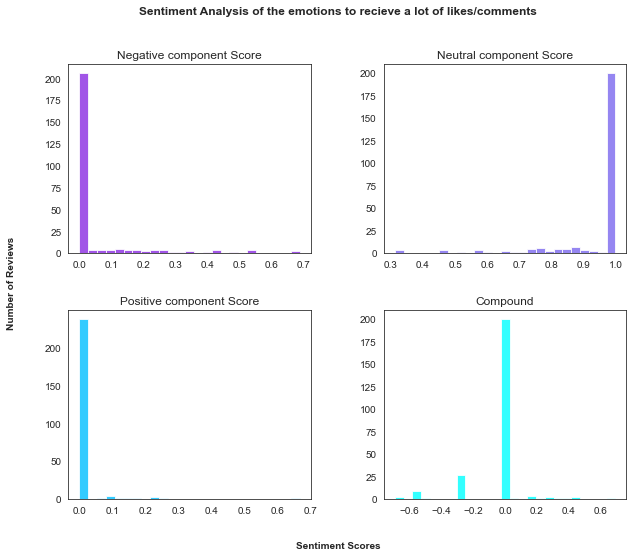

In [59]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
lot_likes.hist('sentiment_neg', bins=25, ax=axes[0,0], color='BlueViolet', alpha=0.8,grid=False)
axes[0,0].set_title('Negative component Score')

lot_likes.hist('sentiment_neu', bins=25, ax=axes[0,1], color='MediumSlateBlue', alpha=0.8,grid=False)
axes[0,1].set_title('Neutral component Score')

lot_likes.hist('sentiment_pos', bins=25, ax=axes[1,0], color='DeepSkyBlue', alpha=0.8,grid=False)
axes[1,0].set_title('Positive component Score')

lot_likes.hist('sentiment_comp', bins=25, ax=axes[1,1], color='cyan', alpha=0.8,grid=False)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title

plt.suptitle('Sentiment Analysis of the emotions to recieve a lot of likes/comments\n\n', fontsize=12, fontweight='bold');
plt.savefig('lot_likes_gridplot.png')

In [60]:
filter_neg = lot_likes[lot_likes.sentiment_comp <= -0.05]

In [61]:
len(filter_neg)

38

In [62]:
filter_neu = lot_likes[(lot_likes.sentiment_comp > -0.05)&(lot_likes.sentiment_comp < 0.05)]

In [63]:
len(filter_neu)

200

In [64]:
filter_pos = lot_likes[lot_likes.sentiment_comp >= 0.05]

In [65]:
len(filter_pos)

12

In [66]:
len(lot_likes)

250

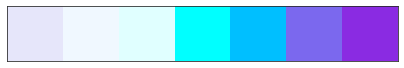

In [67]:
colors = ['lavender','aliceblue','lightcyan','cyan',"DeepSkyBlue", "MediumSlateBlue","BlueViolet"]
sns.palplot(sns.color_palette(colors))

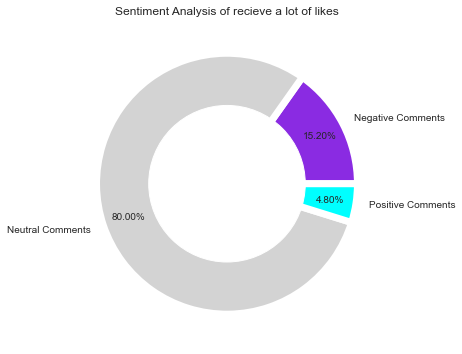

In [72]:
# assign the data
neg = len(filter_neg)*100/len(lot_likes)
mid = len(filter_neu)*100/len(lot_likes)
pos = len(filter_pos)*100/len(lot_likes)
names = ['Negative Comments', 'Neutral Comments','Positive Comments']

size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['BlueViolet', 'lightgray', 'cyan'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,6)
fig.gca().add_artist(my_circle)
plt.title('Sentiment Analysis of recieve a lot of likes')
plt.show()
fig.savefig('lot_likes_donut.png')

In [73]:
neg_comments = filter_neg['emociones'].tolist()

In [74]:
pos_comments = filter_pos['emociones'].tolist()

In [75]:
filter_neg['text_length'] = filter_neg['emociones'].apply(len)
filter_pos['text_length'] = filter_pos['emociones'].apply(len)

In [76]:
filter_neu['text_length'] = filter_neu['emociones'].apply(len)

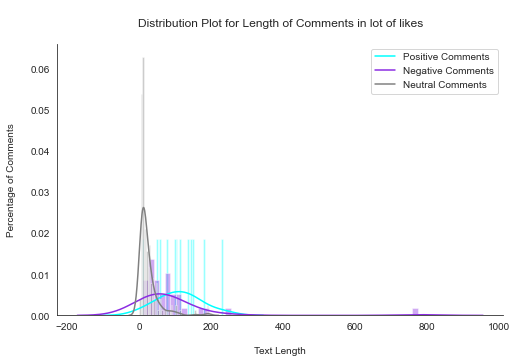

In [77]:
sns.set_style("white")
plt.figure(figsize=(8,5))

sns.distplot(filter_pos['text_length'], kde=True, bins=50, color='cyan')
sns.distplot(filter_neg['text_length'], kde=True, bins=50, color='blueviolet')
sns.distplot(filter_neu['text_length'], kde=True, bins=50, color='grey')

plt.title('\nDistribution Plot for Length of Comments in lot of likes\n')
plt.legend(['Positive Comments', 'Negative Comments','Neutral Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n')
sns.despine();
plt.savefig('lot_likes_lenght.png')

## wordcloud

In [78]:
wc_lot_likes =lot_likes.emociones.values

In [79]:
# Transformamos la columna tipo_porno en un string todo unido
wc_lot_likes = " ".join(lot_likes.emociones)

In [80]:
wc_lot_likes.split(',')

['Felicidades Indiferencia Agobio Agobio Aprobación',
 ' alegría',
 ' integración',
 ' interés',
 ' motivación. Me suena falsedad Felicidad',
 ' aceptación  Subida de autoestima Agradable  Aceptación',
 ' felicidad',
 ' reconocimiento De aceptación Me sorprendente Ninguna Me da igual Pues antes me preocupaba muchísimo más que ahora',
 ' ahora lo miro pero ni fu ni fa. Ahora me interesa más twitter.  En general ninguna emoción Siento que la foto gusta y ',
 'al ser comentarios de mis amigos más cercanos',
 ' me sube el autoestima un poco. Aún así',
 ' estoy aprendiendo a que sean muchos o pocos me sea indiferente la cantidad. Me es indiferente Alegría',
 ' aceptación alegría',
 ' seguridad  Guay Me hace sentir guapa aunque me siento mal porque no soy así',
 ' son los filtros',
 ' las poses... No es algo que me importe demasiado Indiferencia cuando se trata de mí. Cuando subo contenido de fotografías curradas que yo hago',
 ' alegría subida de autoestima por la validación La verdad es qu

In [81]:
wc_lot_likes.split('.')

['Felicidades Indiferencia Agobio Agobio Aprobación, alegría, integración, interés, motivación',
 ' Me suena falsedad Felicidad, aceptación  Subida de autoestima Agradable  Aceptación, felicidad, reconocimiento De aceptación Me sorprendente Ninguna Me da igual Pues antes me preocupaba muchísimo más que ahora, ahora lo miro pero ni fu ni fa',
 ' Ahora me interesa más twitter',
 '  En general ninguna emoción Siento que la foto gusta y ,al ser comentarios de mis amigos más cercanos, me sube el autoestima un poco',
 ' Aún así, estoy aprendiendo a que sean muchos o pocos me sea indiferente la cantidad',
 ' Me es indiferente Alegría, aceptación alegría, seguridad  Guay Me hace sentir guapa aunque me siento mal porque no soy así, son los filtros, las poses',
 '',
 '',
 ' No es algo que me importe demasiado Indiferencia cuando se trata de mí',
 ' Cuando subo contenido de fotografías curradas que yo hago, alegría subida de autoestima por la validación La verdad es que a veces me sube el autoest

In [82]:
wc_lot_likes=wc_lot_likes.lower()
wc_lot_likes=wc_lot_likes.replace(',','')
wc_lot_likes=wc_lot_likes.replace('.','')

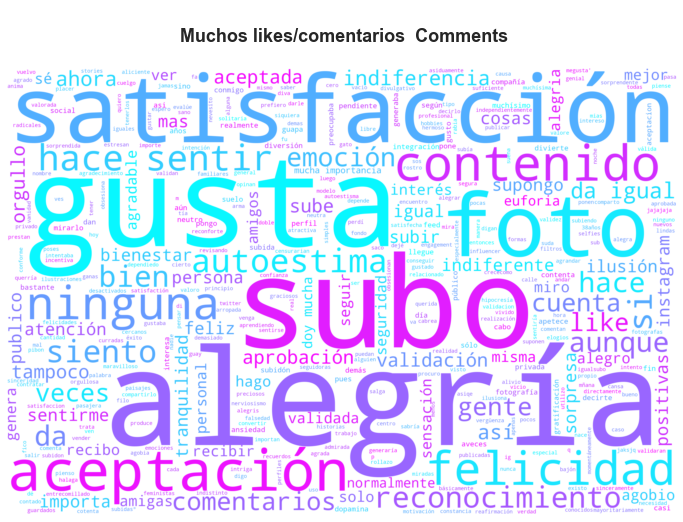

In [84]:
wordcloud = WordCloud(max_font_size=600, max_words=500, background_color="white",colormap='cool',
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('spanish')).generate(str(wc_lot_likes))

plot_wordcloud(wordcloud, '\n Muchos likes/comentarios ')
wordcloud.to_file('lot_likes_wordcloud.png')

# many_likes

In [85]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [86]:
many_likes=pd.read_csv('../datasets/many_likes.csv',index_col=0)

In [87]:
many_likes

,Id,¿Qué emociones te genera recibir pocos me gusta/comentarios?
3,3,Malestar
7,7,Indiferencia
8,8,Rareza
13,13,Me da igual
18,18,"Que genero poco interés, ignorada, fuera de lu..."
...,...,...
428,428,Me da igual
429,429,"Frustración, de que no guste tanto como te esp..."
430,430,"Indistinto, no suelo mirarlo"
431,431,No subo fotos


In [88]:
many_likes.rename(columns={'Id':'Id','¿Qué emociones te genera recibir pocos me gusta/comentarios?':'emociones'},inplace=True)

In [89]:
many_likes

,Id,emociones
3,3,Malestar
7,7,Indiferencia
8,8,Rareza
13,13,Me da igual
18,18,"Que genero poco interés, ignorada, fuera de lu..."
...,...,...
428,428,Me da igual
429,429,"Frustración, de que no guste tanto como te esp..."
430,430,"Indistinto, no suelo mirarlo"
431,431,No subo fotos


In [90]:
many_likes['sentiment_neg'] = many_likes['emociones'].apply(negative_score)

In [91]:
many_likes['sentiment_pos'] = many_likes['emociones'].apply(positive_score)

In [92]:
many_likes['sentiment_neu'] = many_likes['emociones'].apply(neutral_score)

In [93]:
many_likes['sentiment_comp'] = many_likes['emociones'].apply(compound_score)

In [94]:
many_likes

,Id,emociones,sentiment_neg,sentiment_pos,sentiment_neu,sentiment_comp
3,3,Malestar,0.000,0.0,1.000,0.0000
7,7,Indiferencia,0.000,0.0,1.000,0.0000
8,8,Rareza,0.000,0.0,1.000,0.0000
13,13,Me da igual,0.000,0.0,1.000,0.0000
18,18,"Que genero poco interés, ignorada, fuera de lu...",0.167,0.0,0.833,-0.2960
...,...,...,...,...,...,...
428,428,Me da igual,0.000,0.0,1.000,0.0000
429,429,"Frustración, de que no guste tanto como te esp...",0.206,0.0,0.794,-0.5267
430,430,"Indistinto, no suelo mirarlo",0.423,0.0,0.577,-0.2960
431,431,No subo fotos,0.524,0.0,0.476,-0.2960


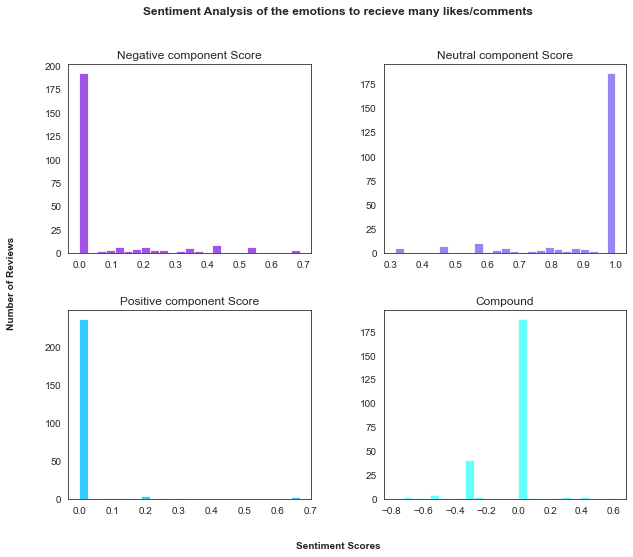

In [95]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
many_likes.hist('sentiment_neg', bins=25, ax=axes[0,0], color='blueviolet', alpha=0.8,grid=False)
axes[0,0].set_title('Negative component Score')

many_likes.hist('sentiment_neu', bins=25, ax=axes[0,1], color='mediumslateblue', alpha=0.8,grid=False)
axes[0,1].set_title('Neutral component Score')

many_likes.hist('sentiment_pos', bins=25, ax=axes[1,0], color='deepskyblue', alpha=0.8,grid=False)
axes[1,0].set_title('Positive component Score')

many_likes.hist('sentiment_comp', bins=25, ax=axes[1,1], color='cyan', alpha=0.6,grid=False)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of the emotions to recieve many likes/comments\n\n', fontsize=12, fontweight='bold');


plt.savefig('many_likes_gridplot.png')

In [96]:
filter_neg = many_likes[many_likes.sentiment_comp <= -0.05]

In [97]:
len(filter_neg)

53

In [98]:
filter_neu = many_likes[(many_likes.sentiment_comp > -0.05)&(many_likes.sentiment_comp < 0.05)]

In [99]:
len(filter_neu)

187

In [100]:
filter_pos = many_likes[many_likes.sentiment_comp >= 0.05]

In [101]:
len(filter_pos)

8

In [102]:
len(many_likes)

248

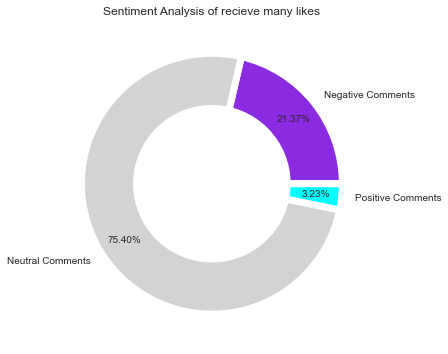

In [105]:
# assign the data
neg = len(filter_neg)*100/len(many_likes)
mid = len(filter_neu)*100/len(many_likes)
pos = len(filter_pos)*100/len(many_likes)
names = ['Negative Comments', 'Neutral Comments','Positive Comments']

size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['blueviolet', 'lightgray', 'cyan'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.title('Sentiment Analysis of recieve many likes')
fig.gca().add_artist(my_circle)
plt.show()
fig.savefig('many_likes_donut.png')

In [106]:
neg_comments = filter_neg['emociones'].tolist()

In [107]:
pos_comments = filter_pos['emociones'].tolist()

In [108]:
filter_neg['text_length'] = filter_neg['emociones'].apply(len)
filter_pos['text_length'] = filter_pos['emociones'].apply(len)

In [109]:
filter_neu['text_length'] = filter_neu['emociones'].apply(len)

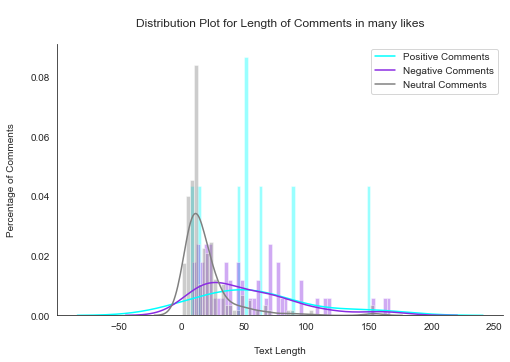

In [110]:
sns.set_style("white")
plt.figure(figsize=(8,5))

sns.distplot(filter_pos['text_length'], kde=True, bins=50, color='cyan')
sns.distplot(filter_neg['text_length'], kde=True, bins=50, color='blueviolet')
sns.distplot(filter_neu['text_length'], kde=True, bins=50, color='grey')

plt.title('\nDistribution Plot for Length of Comments in many likes\n')
plt.legend(['Positive Comments', 'Negative Comments','Neutral Comments'])
plt.xlabel('\nText Length')
plt.ylabel('Percentage of Comments\n')
sns.despine();
plt.savefig('many_likes_lenght.png')



## wordcloud

In [111]:
wc_many_likes =many_likes.emociones.values

In [112]:
# Transformamos la columna tipo_porno en un string todo unido
wc_many_likes = " ".join(many_likes.emociones)

In [113]:
wc_many_likes.split(',')

['Malestar Indiferencia Rareza Me da igual Que genero poco interés',
 ' ignorada',
 ' fuera de lugar',
 ' siento que no encajo. Como si no fuera interesante lo que hago Tristeza',
 ' malestar',
 ' frustración  Antes me influía un poco en la autoestima',
 ' ahora me da igual Curiosidad Indiferencia',
 ' invisibilidad Siento que no soy lo suficientemente atractiva  Me es indiferente Ninguna Me da igual Ni fu ni fa',
 ' ellos se lo pierden xd  Me es bastante indiferente Me choca un poco pero intento que me sea indiferente porque sería estúpido que afectase. Me es indiferente Que no les ha gustado',
 ' pero lo que subo es para mí así que me da igual desilusión y decepción  Raro No me imporya mucho pero me acabo sintiendo fea. No me importa demasiado Indiferencia cuando se trata de mí porque suele ser algún recuerdo con algún amigo. Cuando subo contenido de fotografías curradas que yo hago',
 ' tristeza tristeza',
 ' me siento ignorada Antes me preocupaba',
 ' ahora simplemente pienso que y

In [114]:
wc_many_likes.split('.')

['Malestar Indiferencia Rareza Me da igual Que genero poco interés, ignorada, fuera de lugar, siento que no encajo',
 ' Como si no fuera interesante lo que hago Tristeza, malestar, frustración  Antes me influía un poco en la autoestima, ahora me da igual Curiosidad Indiferencia, invisibilidad Siento que no soy lo suficientemente atractiva  Me es indiferente Ninguna Me da igual Ni fu ni fa, ellos se lo pierden xd  Me es bastante indiferente Me choca un poco pero intento que me sea indiferente porque sería estúpido que afectase',
 ' Me es indiferente Que no les ha gustado, pero lo que subo es para mí así que me da igual desilusión y decepción  Raro No me imporya mucho pero me acabo sintiendo fea',
 ' No me importa demasiado Indiferencia cuando se trata de mí porque suele ser algún recuerdo con algún amigo',
 ' Cuando subo contenido de fotografías curradas que yo hago, tristeza tristeza, me siento ignorada Antes me preocupaba, ahora simplemente pienso que yo veo fotos que me gustan o pien

In [115]:
wc_many_likes=wc_many_likes.lower()
wc_many_likes=wc_many_likes.replace(',','')
wc_many_likes=wc_many_likes.replace('.','')

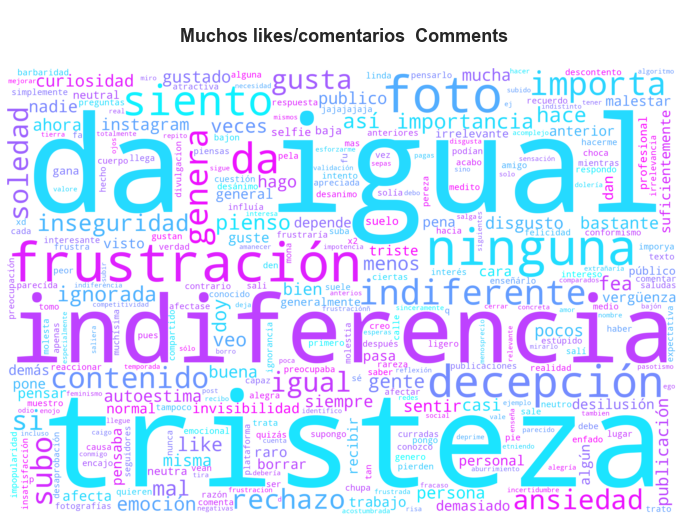

In [118]:
wordcloud = WordCloud(max_font_size=600, max_words=600, background_color="white",colormap='cool',
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('spanish')).generate(str(wc_many_likes))

plot_wordcloud(wordcloud, '\n Many likes/coments ')
wordcloud.to_file('many_likes_wordcloud.png')